In [1]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


# Exploratory Data Analysis and Feature Engineering

In [2]:
dataset = pd.read_excel("Aqarat2.xlsx")
dataset.drop(["Unnamed: 0"], axis=1, inplace=True)
dataset

,DISTRICT,REGION,PRICE,DURATION,BED,BATH,LIVING,AGE,IMAGES,FLOOR,TARGET,FURNISHED,KITCHEN,ANNEXE,PARKING,ELEVATOR,AC,url
0,حي النرجس,شمال الرياض,50000,سنوي,3,2,1.0,0.0,7,أرضي,Families,0,1,0,0,0,1,https://sa.aqar.fm/شقق-للإيجار/الرياض/شمال-الر...
1,حي النرجس,شمال الرياض,55000,سنوي,5,3,1.0,0.0,9,علوي,Families,0,1,0,0,1,1,https://sa.aqar.fm/شقق-للإيجار/الرياض/شمال-الر...
2,حي النسيم الغربي,شرق الرياض,18000,سنوي,2,2,1.0,9.0,7,علوي,Families,0,0,0,0,0,0,https://sa.aqar.fm/شقق-للإيجار/الرياض/شرق-الري...
3,حي الرمال,شرق الرياض,15500,سنوي,3,2,1.0,3.0,11,3,Families,0,1,1,0,0,0,https://sa.aqar.fm/شقق-للإيجار/الرياض/شرق-الري...
4,حي الدار البيضاء,جنوب الرياض,1400,شهري,3,2,1.0,6.0,10,علوي,Families,0,1,0,0,0,0,https://sa.aqar.fm/شقق-للإيجار/الرياض/جنوب-الر...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6974,حي الملز,شرق الرياض,15000,سنوي,1,1,1.0,NaN,4,3,Families,0,1,0,1,1,1,https://sa.aqar.fm/شقق-للإيجار/الرياض/شرق-الري...
6975,حي العقيق,شمال الرياض,20000,سنوي,1,1,NaN,3.0,3,علوي,Bachelors,0,1,0,0,1,1,https://sa.aqar.fm/شقق-للإيجار/الرياض/شمال-الر...
6976,حي العقيق,شمال الرياض,25000,سنوي,1,1,NaN,NaN,0,علوي,Families,0,1,0,0,1,1,https://sa.aqar.fm/شقق-للإيجار/الرياض/شمال-الر...
6977,حي الياسمين,شمال الرياض,40000,سنوي,4,3,1.0,2.0,15,علوي,Families,0,1,0,0,0,1,https://sa.aqar.fm/شقق-للإيجار/الرياض/شمال-الر...


## remove duplicats

In [3]:
now = len(dataset)
dataset.drop_duplicates()
after = len(dataset)
after - now

0

## remove daily and monthly rentals

In [4]:
dataset.DURATION.value_counts()

سنوي    5455
شهري    1465
يومي      59
Name: DURATION, dtype: int64

In [5]:
dataset = dataset[dataset.DURATION == 'سنوي'].copy()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5455 entries, 0 to 6978
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DISTRICT   5455 non-null   object 
 1   REGION     5455 non-null   object 
 2   PRICE      5455 non-null   int64  
 3   DURATION   5455 non-null   object 
 4   BED        5455 non-null   int64  
 5   BATH       5455 non-null   int64  
 6   LIVING     4942 non-null   float64
 7   AGE        4345 non-null   float64
 8   IMAGES     5455 non-null   int64  
 9   FLOOR      5455 non-null   object 
 10  TARGET     5455 non-null   object 
 11  FURNISHED  5455 non-null   int64  
 12  KITCHEN    5455 non-null   int64  
 13  ANNEXE     5455 non-null   int64  
 14  PARKING    5455 non-null   int64  
 15  ELEVATOR   5455 non-null   int64  
 16  AC         5455 non-null   int64  
 17  url        5455 non-null   object 
dtypes: float64(2), int64(10), object(6)
memory usage: 809.7+ KB


## remove beds less than 5

<AxesSubplot:xlabel='BED', ylabel='PRICE'>

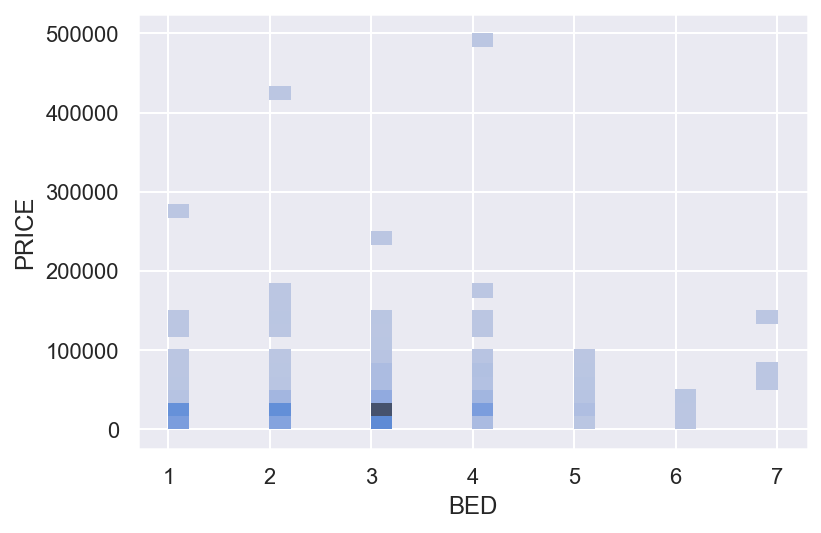

In [6]:
sns.histplot(dataset, x='BED', y='PRICE', bins=30)

<AxesSubplot:>

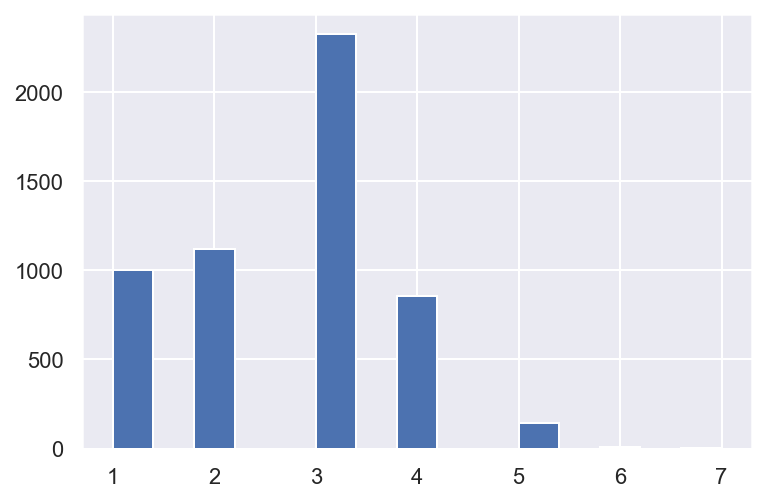

In [7]:
dataset.BED.hist(bins=15)

Text(0.5, 0, 'Beds')

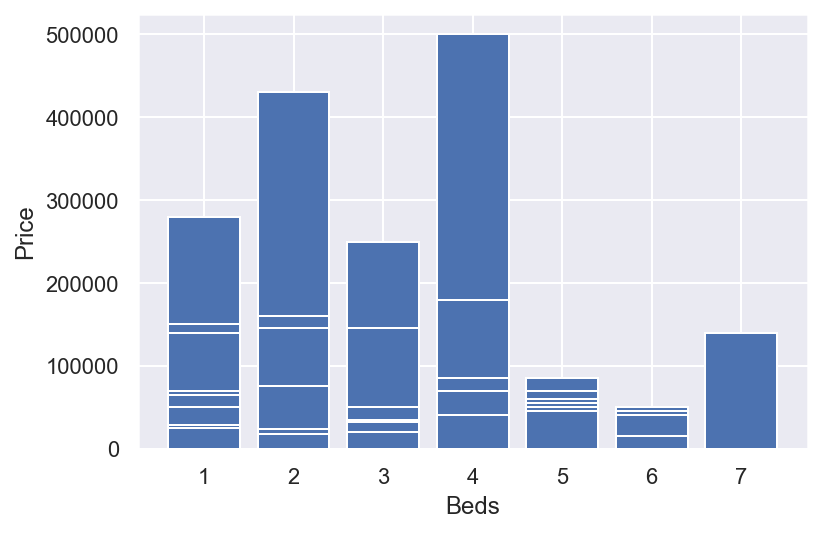

In [8]:
plt.bar(dataset.BED, dataset.PRICE)
plt.ylabel("Price")
plt.xlabel("Beds")

In [9]:
dataset.BED.value_counts()

3    2323
2    1117
1    1001
4     854
5     145
6      10
7       5
Name: BED, dtype: int64

In [10]:
# consider 5,6,7 beds outliers and remove them
dataset = dataset[dataset.BED <= 4].copy()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5295 entries, 0 to 6978
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DISTRICT   5295 non-null   object 
 1   REGION     5295 non-null   object 
 2   PRICE      5295 non-null   int64  
 3   DURATION   5295 non-null   object 
 4   BED        5295 non-null   int64  
 5   BATH       5295 non-null   int64  
 6   LIVING     4788 non-null   float64
 7   AGE        4228 non-null   float64
 8   IMAGES     5295 non-null   int64  
 9   FLOOR      5295 non-null   object 
 10  TARGET     5295 non-null   object 
 11  FURNISHED  5295 non-null   int64  
 12  KITCHEN    5295 non-null   int64  
 13  ANNEXE     5295 non-null   int64  
 14  PARKING    5295 non-null   int64  
 15  ELEVATOR   5295 non-null   int64  
 16  AC         5295 non-null   int64  
 17  url        5295 non-null   object 
dtypes: float64(2), int64(10), object(6)
memory usage: 786.0+ KB


## Price Outliers

(array([4.835e+03, 4.170e+02, 3.200e+01, 5.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([9.900000e+01, 5.008910e+04, 1.000792e+05, 1.500693e+05,
        2.000594e+05, 2.500495e+05, 3.000396e+05, 3.500297e+05,
        4.000198e+05, 4.500099e+05, 5.000000e+05]),
 <BarContainer object of 10 artists>)

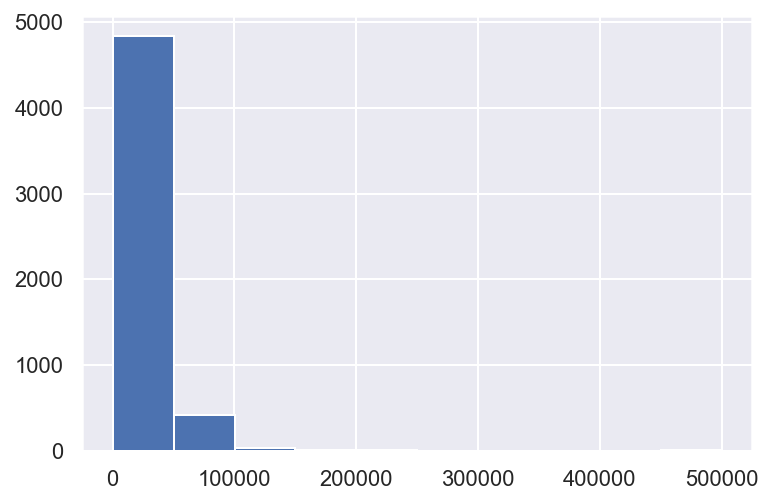

In [11]:
plt.hist(dataset.PRICE)

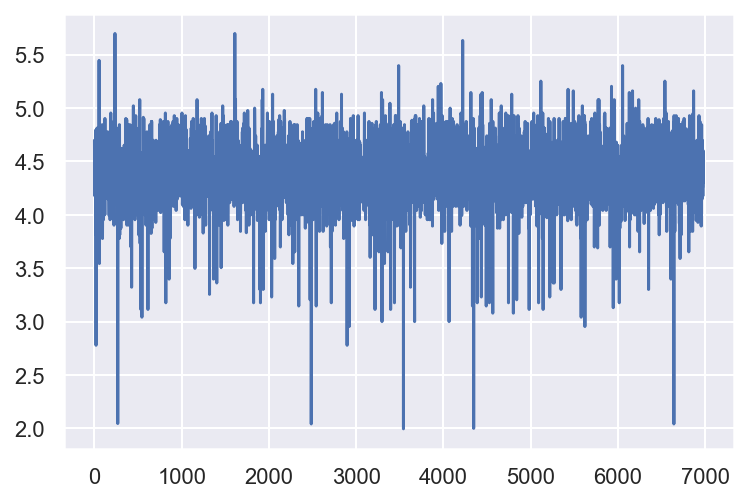

In [12]:
plt.plot(np.log10(dataset.PRICE))

In [13]:
dataset.sort_values(by='PRICE', ascending=False)[:10]#.to_excel('g.xlsx')

,DISTRICT,REGION,PRICE,DURATION,BED,BATH,LIVING,AGE,IMAGES,FLOOR,TARGET,FURNISHED,KITCHEN,ANNEXE,PARKING,ELEVATOR,AC,url
1609,حي المشاعل,جنوب الرياض,500000,سنوي,4,2,1.0,0.0,1,أرضي,Bachelors,0,0,0,0,0,0,https://sa.aqar.fm/شقق-للإيجار/الرياض/جنوب-الر...
235,حي المشاعل,جنوب الرياض,500000,سنوي,4,2,1.0,0.0,1,أرضي,Bachelors,0,0,0,0,0,0,https://sa.aqar.fm/شقق-للإيجار/الرياض/جنوب-الر...
4221,حي اشبيلية,شرق الرياض,430000,سنوي,2,2,1.0,7.0,0,أرضي,Families,0,0,0,0,1,0,https://sa.aqar.fm/شقق-للإيجار/الرياض/شرق-الري...
53,حي المونسية,شرق الرياض,280000,سنوي,1,2,NaN,6.0,0,أرضي,Families,0,0,0,0,0,0,https://sa.aqar.fm/شقق-للإيجار/الرياض/شرق-الري...
3487,حي الشهداء,شرق الرياض,250000,سنوي,3,2,1.0,15.0,0,أرضي,Families,0,0,0,0,0,0,https://sa.aqar.fm/شقق-للإيجار/الرياض/شرق-الري...
6054,حي السويدي الغربي,غرب الرياض,250000,سنوي,3,2,1.0,9.0,1,أرضي,Families,0,1,0,0,1,0,https://sa.aqar.fm/شقق-للإيجار/الرياض/غرب-الري...
6539,حي الصحافة,شمال الرياض,179000,سنوي,4,5,1.0,0.0,16,20,Families,0,1,0,1,1,1,https://sa.aqar.fm/شقق-للإيجار/الرياض/شمال-الر...
5117,حي الصحافة,شمال الرياض,179000,سنوي,4,5,1.0,0.0,16,20,Families,0,1,0,1,1,1,https://sa.aqar.fm/شقق-للإيجار/الرياض/شمال-الر...
3971,حي الصحافة,شمال الرياض,170000,سنوي,2,4,1.0,2.0,3,20,Families,1,1,1,1,1,1,https://sa.aqar.fm/شقق-للإيجار/الرياض/شمال-الر...
5927,حي الصحافة,شمال الرياض,160000,سنوي,2,3,1.0,3.0,7,20,Families,1,1,0,1,1,1,https://sa.aqar.fm/شقق-للإيجار/الرياض/شمال-الر...


In [14]:
dataset.sort_values(by='PRICE', ascending=True)[:10]#.to_excel('f.xlsx')

,DISTRICT,REGION,PRICE,DURATION,BED,BATH,LIVING,AGE,IMAGES,FLOOR,TARGET,FURNISHED,KITCHEN,ANNEXE,PARKING,ELEVATOR,AC,url
3542,حي منفوحة,وسط الرياض,99,سنوي,2,2,1.0,NaN,2,علوي,Bachelors,0,0,0,0,0,0,https://sa.aqar.fm/شقق-للإيجار/الرياض/وسط-الري...
4347,حي الرمال,شرق الرياض,100,سنوي,3,2,1.0,0.0,0,3,Families,0,1,0,0,0,0,https://sa.aqar.fm/شقق-للإيجار/الرياض/شرق-الري...
6642,حي النظيم,شرق الرياض,110,سنوي,3,3,1.0,NaN,8,علوي,Families,0,1,0,0,0,0,https://sa.aqar.fm/شقق-للإيجار/الرياض/شرق-الري...
2485,حي النظيم,شرق الرياض,110,سنوي,3,3,1.0,NaN,8,علوي,Families,0,1,0,0,0,0,https://sa.aqar.fm/شقق-للإيجار/الرياض/شرق-الري...
267,حي الدار البيضاء,جنوب الرياض,111,سنوي,3,2,NaN,6.0,6,3,Families,0,1,1,0,0,0,https://sa.aqar.fm/شقق-للإيجار/الرياض/جنوب-الر...
2896,حي المونسية,شرق الرياض,600,سنوي,1,1,NaN,NaN,1,علوي,Families,0,0,0,0,0,0,https://sa.aqar.fm/شقق-للإيجار/الرياض/شرق-الري...
18,حي المونسية,شرق الرياض,600,سنوي,1,1,NaN,NaN,1,4,Families,0,0,0,0,0,0,https://sa.aqar.fm/شقق-للإيجار/الرياض/شرق-الري...
5622,حي عتيقة,وسط الرياض,899,سنوي,2,1,1.0,5.0,2,علوي,Families,0,1,0,0,0,1,https://sa.aqar.fm/شقق-للإيجار/الرياض/وسط-الري...
2920,حي عتيقة,وسط الرياض,899,سنوي,2,1,1.0,5.0,2,علوي,Families,0,1,0,0,0,1,https://sa.aqar.fm/شقق-للإيجار/الرياض/وسط-الري...
3296,حي العزيزية,جنوب الرياض,1000,سنوي,3,1,1.0,NaN,0,أرضي,Families,0,1,0,0,0,0,https://sa.aqar.fm/شقق-للإيجار/الرياض/جنوب-الر...


In [15]:
# ads above 100.000 are problomatic, inacurrate, and only small percentage of overall dataset
# adds below 7.000 are either fake or inacurate
# will be treated as outliers
dataset = dataset[dataset.PRICE <= 100_000].copy()
dataset = dataset[dataset.PRICE >= 7_000].copy()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5148 entries, 0 to 6978
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DISTRICT   5148 non-null   object 
 1   REGION     5148 non-null   object 
 2   PRICE      5148 non-null   int64  
 3   DURATION   5148 non-null   object 
 4   BED        5148 non-null   int64  
 5   BATH       5148 non-null   int64  
 6   LIVING     4675 non-null   float64
 7   AGE        4126 non-null   float64
 8   IMAGES     5148 non-null   int64  
 9   FLOOR      5148 non-null   object 
 10  TARGET     5148 non-null   object 
 11  FURNISHED  5148 non-null   int64  
 12  KITCHEN    5148 non-null   int64  
 13  ANNEXE     5148 non-null   int64  
 14  PARKING    5148 non-null   int64  
 15  ELEVATOR   5148 non-null   int64  
 16  AC         5148 non-null   int64  
 17  url        5148 non-null   object 
dtypes: float64(2), int64(10), object(6)
memory usage: 764.2+ KB


(array([1334., 2032.,  773.,  443.,  159.,   97.,  150.,  101.,   54.,
           5.]),
 array([  7000.,  16300.,  25600.,  34900.,  44200.,  53500.,  62800.,
         72100.,  81400.,  90700., 100000.]),
 <BarContainer object of 10 artists>)

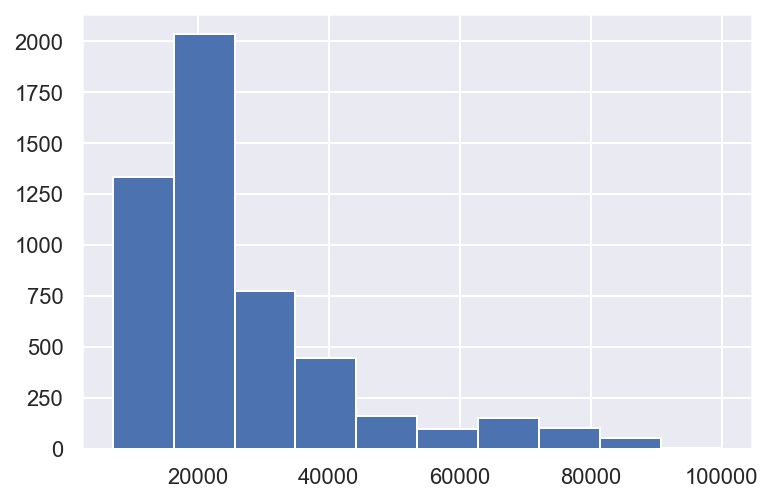

In [16]:
plt.hist(dataset.PRICE)

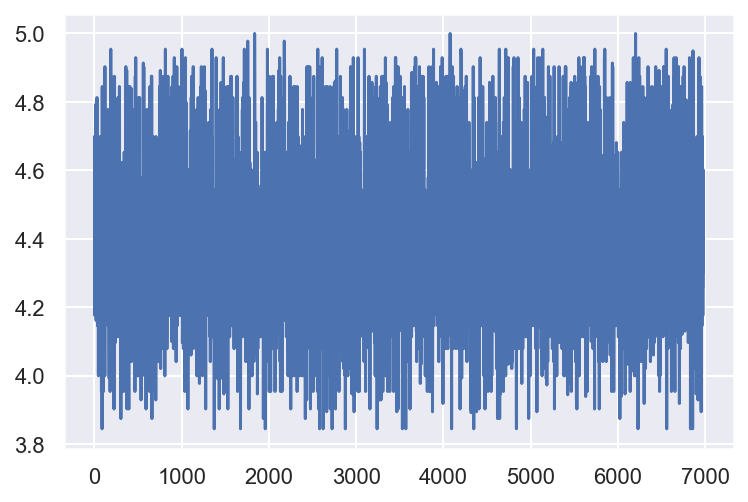

In [17]:
plt.plot(np.log10(dataset.PRICE))

## Cleaning

In [18]:
dataset.LIVING.fillna(0, inplace=True)
dataset.AGE.fillna(1, inplace=True)

In [19]:
dataset["TARGET"].replace("Bachelors", 0, inplace=True)
dataset["TARGET"].replace("Families", 1, inplace=True)

dataset["FLOOR"].replace("أرضي", 0, inplace=True)
dataset["FLOOR"].replace("علوي", 1, inplace=True)
dataset["FLOOR"] = pd.to_numeric(dataset["FLOOR"])

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5148 entries, 0 to 6978
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DISTRICT   5148 non-null   object 
 1   REGION     5148 non-null   object 
 2   PRICE      5148 non-null   int64  
 3   DURATION   5148 non-null   object 
 4   BED        5148 non-null   int64  
 5   BATH       5148 non-null   int64  
 6   LIVING     5148 non-null   float64
 7   AGE        5148 non-null   float64
 8   IMAGES     5148 non-null   int64  
 9   FLOOR      5148 non-null   int64  
 10  TARGET     5148 non-null   int64  
 11  FURNISHED  5148 non-null   int64  
 12  KITCHEN    5148 non-null   int64  
 13  ANNEXE     5148 non-null   int64  
 14  PARKING    5148 non-null   int64  
 15  ELEVATOR   5148 non-null   int64  
 16  AC         5148 non-null   int64  
 17  url        5148 non-null   object 
dtypes: float64(2), int64(12), object(4)
memory usage: 764.2+ KB


## map neighborhoods to Amanat/Baldiat

In [21]:
# total neighborhoods in the dataset
len(dataset.DISTRICT.unique())

141

In [22]:
A = {
    "حي الملقا": "بلدية الشمال",
    "حي الربيع": "بلدية الشمال",
    "حي الندى": "بلدية الشمال",
    "حي الصحافة": "بلدية الشمال",
    "حي النرجس": "بلدية الشمال",
    "حي العارض": "بلدية الشمال",
    "حي النفل": "بلدية الشمال",
    "حي العقيق": "بلدية الشمال",
    "حي الوادي": "بلدية الشمال",
    "حي الغدير": "بلدية الشمال",
    "حي الياسمين": "بلدية الشمال",
    "حي الفلاح": "بلدية الشمال",
    "حي بنبان": "بلدية الشمال",
    "حي القيروان": "بلدية الشمال",
    "حي حطين": "بلدية الشمال",
    "حي مطار الملك خالد الدولي": "بلدية الشمال",
    "حي جامعة الامام محمد بن سعود الاسلامية": "بلدية الشمال"
    #####
    ,
    "حي الروضة": "بلدية الروضة",
    "حي الرمال": "بلدية الروضة",
    "حي المونسية": "بلدية الروضة",
    "حي قرطبة": "بلدية الروضة",
    "حي الجنادرية": "بلدية الروضة",
    "حي القادسية": "بلدية الروضة",
    "حي اليرموك": "بلدية الروضة",
    "حي غرناطة": "بلدية الروضة",
    "حي أشبيلية": "بلدية الروضة",
    "حي اشبيلية": "بلدية الروضة",
    "حي الحمراء": "بلدية الروضة",
    "حي المعيزلية": "بلدية الروضة",
    "حي الخليج": "بلدية الروضة",
    "حي الملك فيصل": "بلدية الروضة",
    "حي القدس": "بلدية الروضة",
    "حي النهضة": "بلدية الروضة",
    "حي الأندلس": "بلدية الروضة",
    "حي الاندلس": "بلدية الروضة",
    "حي الشهداء": "بلدية الروضة",
    "حي المعيزلة": "بلدية الروضة"
    #######
    ,
    "حي العليا": "بلدية العليا",
    "حي السليمانية": "بلدية العليا",
    "حي الملك عبدالعزيز": "بلدية العليا",
    "حي الملك عبدالله": "بلدية العليا",
    "حي الورود": "بلدية العليا",
    "حي صلاح الدين": "بلدية العليا",
    "حي الملك فهد": "بلدية العليا",
    "حي المرسلات": "بلدية العليا",
    "حي النزهة": "بلدية العليا",
    "حي المغرزات": "بلدية العليا",
    "حي المروج": "بلدية العليا",
    "حي المصيف": "بلدية العليا",
    "حي التعاون": "بلدية العليا",
    "حي الازدهار": "بلدية العليا",
    "حي الواحة": "بلدية العليا"
    #######
    ,
    "حي المعذر": "بلدية المعذر",
    "حي المعذر الشمالي": "بلدية المعذر",
    "حي المحمدية": "بلدية المعذر",
    "حي الرحمانية": "بلدية المعذر",
    "حي الرائد": "بلدية المعذر",
    "حي النخيل": "بلدية المعذر",
    "حي ام الحمام الشرقي": "بلدية المعذر",
    "حي ام الحمام الغربي": "بلدية المعذر",
    #######
    "هجرة وادي لبن": "بلدية العريجاء",
    "حي العريجاء": "بلدية العريجاء",
    "حي العريجاء الوسطى": "بلدية العريجاء",
    "حي العريجاء الغربية": "بلدية العريجاء",
    "حي الدريهمية": "بلدية العريجاء",
    "حي شبرا": "بلدية العريجاء",
    "حي السويدي": "بلدية العريجاء",
    "حي السويدي الغربي": "بلدية العريجاء",
    "حي ظهرة البديعة": "بلدية العريجاء",
    "حي سلطانة": "بلدية العريجاء",
    "حي الزهرة": "بلدية العريجاء",
    #######
    "هجرة وادي لبن": "بلدية نمار",
    "حي ظهرة نمار": "بلدية نمار",
    "حي ديراب": "بلدية نمار",
    "حي نمار": "بلدية نمار",
    "حي الحزم": "بلدية نمار",
    "حي طويق": "بلدية نمار",
    #######
    "حي أحد": "بلدية الشفا",
    "حي عكاظ": "بلدية الشفا",
    "حي الشفا": "بلدية الشفا",
    "حي المروة": "بلدية الشفا",
    "حي بدر": "بلدية الشفا",
    "حي المصانع": "بلدية الشفا",
    "حي المنصورية": "بلدية الشفا",
    "حي عريض": "بلدية الشفا",
    "حي العماجية": "بلدية الشفا",
    #######
    "حي خشم العان": "بلدية السلي",
    "حي الدفاع": "بلدية السلي",
    "حي المناخ": "بلدية السلي",
    "حي السلي": "بلدية السلي",
    "حي النور": "بلدية السلي",
    "حي الإسكان": "بلدية السلي",
    "حي المدينة الصناعية الجديدة": "بلدية السلي",
    "حي الفيحاء": "بلدية السلي",
    "حي الجزيرة": "بلدية السلي",
    "حي السعادة": "بلدية السلي",
    "حي هيت": "بلدية السلي",
    "حي البرية": "بلدية السلي",
    "حي المشاعل": "بلدية السلي",
    #######
    "حي السفارات": "بلدية عرقة",
    "حي المهدية": "بلدية عرقة",
    "حي عرقة": "بلدية عرقة",
    "حي ظهرة لبن": "بلدية عرقة",
    "حي الخزامى": "بلدية عرقة",
    "حي لبن": "بلدية عرقة"
    #######
    ,
    "حي النسيم الشرقي": "بلدية النسيم",
    "حي النسيم الغربي": "بلدية النسيم",
    "حي السلام": "بلدية النسيم",
    "حي الروابي": "بلدية النسيم",
    "حي النظيم": "بلدية النسيم",
    "حي المنار": "بلدية النسيم",
    "حي الندوة": "بلدية النسيم",
    "حي الريان": "بلدية النسيم",
    "حي الرماية": "بلدية النسيم"
    #######
    ,
    "حي جرير": "بلدية الملز",
    "حي الربوة": "بلدية الملز",
    "حي الزهراء": "بلدية الملز",
    "حي الصفا": "بلدية الملز",
    "حي الضباط": "بلدية الملز",
    "حي الملز": "بلدية الملز",
    "حي الوزارات": "بلدية الملز",
    "حي الفاروق": "بلدية الملز",
    "حي العمل": "بلدية الملز",
    "حي ثليم": "بلدية الملز",
    "حي المربع": "بلدية الملز",
    "حي الفوطة": "بلدية الملز"
    #######
    ,
    "حي الرفيعة": "بلدية الشميسي",
    "حي الهدا": "بلدية الشميسي",
    "حي الشرقية": "بلدية الشميسي",
    "حي الشرق": "بلدية الشميسي",
    "حي الناصرية": "بلدية الشميسي",
    "حي صياح": "بلدية الشميسي",
    "حي الوشام": "بلدية الشميسي",
    "حي النموذجية": "بلدية الشميسي",
    "حي المعذر": "بلدية الشميسي",
    "حي المؤتمرات": "بلدية الشميسي",
    "حي البديعة": "بلدية الشميسي",
    "حي ام سليم": "بلدية الشميسي",
    "حي الشميسي": "بلدية الشميسي",
    "حي الجرادية": "بلدية الشميسي",
    "حي الفاخرية": "بلدية الشميسي",
    "حي عليشة": "بلدية الشميسي"
    #######
    ,
    "حي الدوبية": "بلدية البطحاء",
    "حي القرى": "بلدية البطحاء",
    "حي الصناعية": "بلدية البطحاء",
    "حي الوسيطاء": "بلدية البطحاء",
    "حي معكال": "بلدية البطحاء",
    "حي الفيصلية": "بلدية البطحاء",
    "حي منفوحة": "بلدية البطحاء",
    "حي المنصورة": "بلدية البطحاء",
    "حي اليمامة": "بلدية البطحاء",
    "حي سلام": "بلدية البطحاء",
    "حي جبرة": "بلدية البطحاء",
    "حي عتيقة": "بلدية البطحاء",
    "حي غبيرة": "بلدية البطحاء",
    "حي البطحاء": "بلدية البطحاء",
    "حي الخالدية": "بلدية البطحاء",
    "حي الديرة": "بلدية البطحاء",
    "حي العود": "بلدية البطحاء",
    "حي المرقب": "بلدية البطحاء",
    "حي منفوحة الجديدة": "بلدية البطحاء",
    "حي البطيحا": "بلدية البطحاء",
    "حي سكيرينة": "بلدية البطحاء",
    "حي الصالحية": "بلدية البطحاء"
    ######
    ,
    "حي العزيزية": "بلدية العزيزية",
    "حي طيبة": "بلدية العزيزية",
    "حي المصفاة": "بلدية العزيزية",
    "حي الدار البيضاء": "بلدية العزيزية",
    "حي المصانع": "بلدية العزيزية"
    ######
    ,
    "حي الحاير": "بلدية الحائر",
    "حي الحائر": "بلدية الحائر",
    "حي الغنامية": "بلدية الحائر"
}

dataset['Amanat'] = dataset['DISTRICT'].map(A)

In [23]:
# remaining not mapped neighborhoods to be dropped
len(dataset[dataset.Amanat.isnull()]['DISTRICT'])

2

In [24]:
dataset[dataset.Amanat.isnull()]['DISTRICT'].value_counts()

حي الشرفية    1
حي الاسكان    1
Name: DISTRICT, dtype: int64

In [25]:
# drop rows with any NaN
dataset.dropna(how='any', inplace=True)

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5146 entries, 0 to 6978
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DISTRICT   5146 non-null   object 
 1   REGION     5146 non-null   object 
 2   PRICE      5146 non-null   int64  
 3   DURATION   5146 non-null   object 
 4   BED        5146 non-null   int64  
 5   BATH       5146 non-null   int64  
 6   LIVING     5146 non-null   float64
 7   AGE        5146 non-null   float64
 8   IMAGES     5146 non-null   int64  
 9   FLOOR      5146 non-null   int64  
 10  TARGET     5146 non-null   int64  
 11  FURNISHED  5146 non-null   int64  
 12  KITCHEN    5146 non-null   int64  
 13  ANNEXE     5146 non-null   int64  
 14  PARKING    5146 non-null   int64  
 15  ELEVATOR   5146 non-null   int64  
 16  AC         5146 non-null   int64  
 17  url        5146 non-null   object 
 18  Amanat     5146 non-null   object 
dtypes: float64(2), int64(12), object(5)
memory usage

In [27]:
dataset.describe()

,PRICE,BED,BATH,LIVING,AGE,IMAGES,FLOOR,TARGET,FURNISHED,KITCHEN,ANNEXE,PARKING,ELEVATOR,AC
count,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000
mean,26314.057132,2.582200,1.880490,0.959775,4.588224,7.260979,1.308006,0.918189,0.027983,0.833852,0.048387,0.082394,0.357365,0.503109
std,15867.841080,0.969679,0.713537,0.384509,6.122724,5.199808,1.152410,0.274103,0.164940,0.372250,0.214604,0.274991,0.479270,0.500039
min,7000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16000.000000,2.000000,1.000000,1.000000,0.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,21000.000000,3.000000,2.000000,1.000000,2.000000,7.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,30000.000000,3.000000,2.000000,1.000000,6.000000,10.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,100000.000000,4.000000,5.000000,3.000000,36.000000,30.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
dataset.columns

Index(['DISTRICT', 'REGION', 'PRICE', 'DURATION', 'BED', 'BATH', 'LIVING',
       'AGE', 'IMAGES', 'FLOOR', 'TARGET', 'FURNISHED', 'KITCHEN', 'ANNEXE',
       'PARKING', 'ELEVATOR', 'AC', 'url', 'Amanat'],
      dtype='object')

In [29]:
dataset.Amanat.value_counts()

بلدية الشمال      1468
بلدية الروضة      1459
بلدية عرقة         308
بلدية العليا       296
بلدية نمار         239
بلدية النسيم       225
بلدية الملز        214
بلدية الشفا        179
بلدية العريجاء     166
بلدية السلي        142
بلدية البطحاء      125
بلدية العزيزية     124
بلدية الشميسي      102
بلدية المعذر        96
بلدية الحائر         3
Name: Amanat, dtype: int64

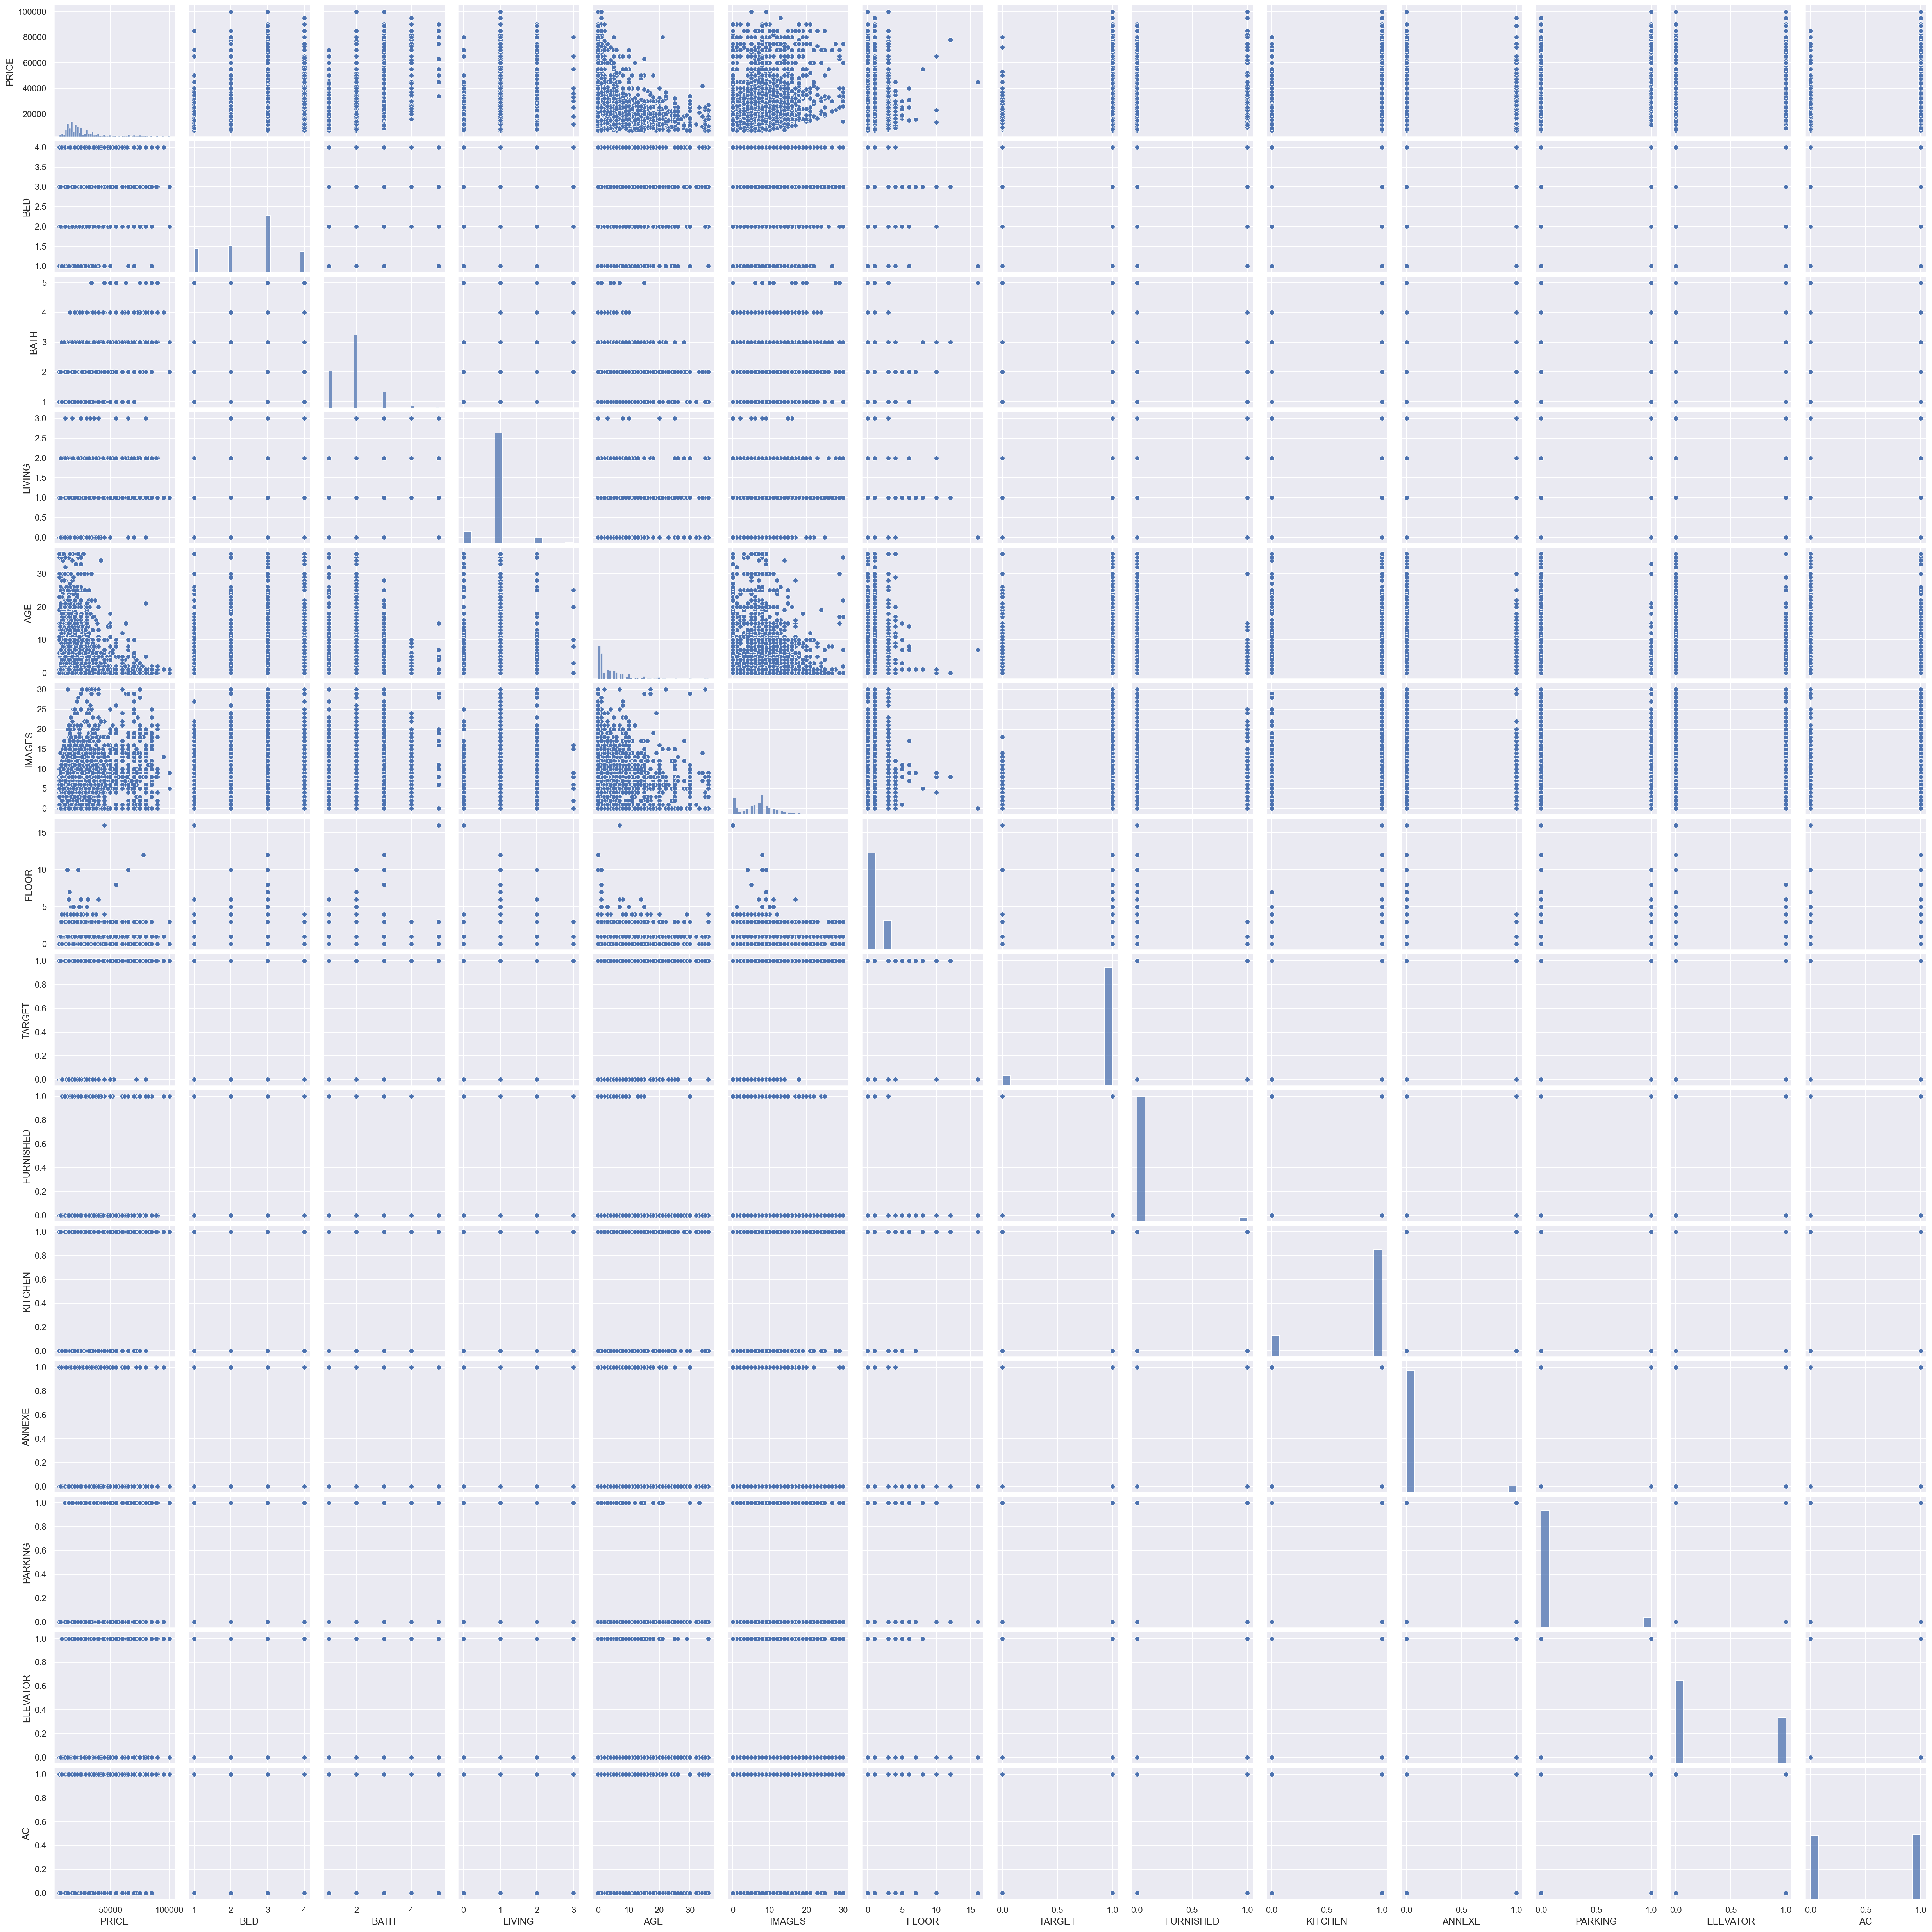

In [30]:
sns.pairplot(dataset)

<AxesSubplot:>

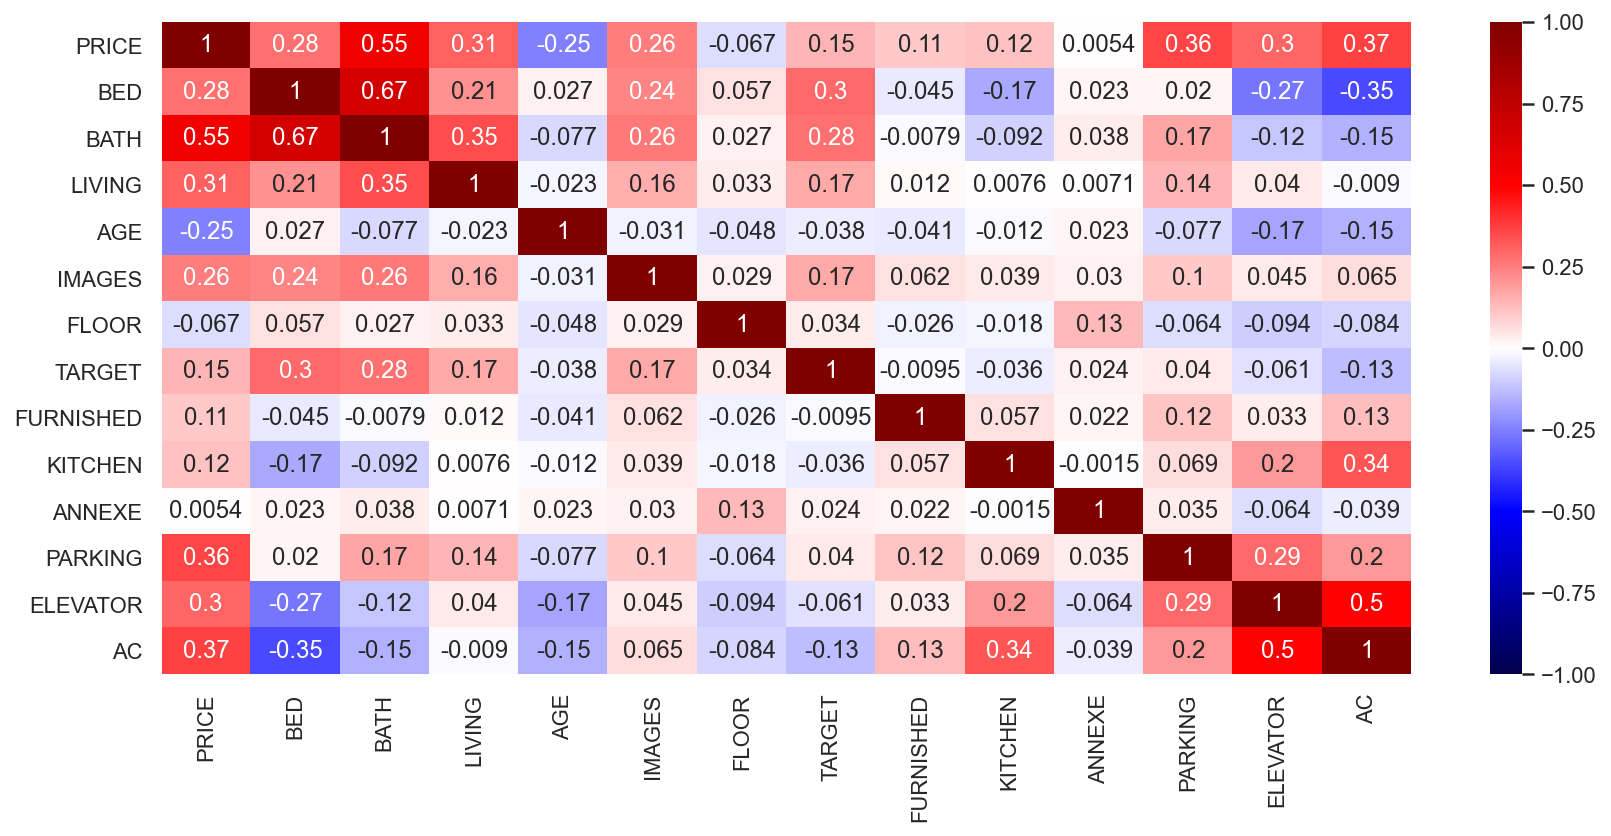

In [31]:
plt.figure(figsize=(14, 6))
sns.heatmap(dataset.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

In [32]:
dataset

,DISTRICT,REGION,PRICE,DURATION,BED,BATH,LIVING,AGE,IMAGES,FLOOR,TARGET,FURNISHED,KITCHEN,ANNEXE,PARKING,ELEVATOR,AC,url,Amanat
0,حي النرجس,شمال الرياض,50000,سنوي,3,2,1.0,0.0,7,0,1,0,1,0,0,0,1,https://sa.aqar.fm/شقق-للإيجار/الرياض/شمال-الر...,بلدية الشمال
2,حي النسيم الغربي,شرق الرياض,18000,سنوي,2,2,1.0,9.0,7,1,1,0,0,0,0,0,0,https://sa.aqar.fm/شقق-للإيجار/الرياض/شرق-الري...,بلدية النسيم
3,حي الرمال,شرق الرياض,15500,سنوي,3,2,1.0,3.0,11,3,1,0,1,1,0,0,0,https://sa.aqar.fm/شقق-للإيجار/الرياض/شرق-الري...,بلدية الروضة
5,حي النسيم الغربي,شرق الرياض,15000,سنوي,3,2,0.0,23.0,6,0,1,0,0,0,0,0,0,https://sa.aqar.fm/شقق-للإيجار/الرياض/شرق-الري...,بلدية النسيم
6,حي الملقا,شمال الرياض,36000,سنوي,3,2,1.0,0.0,9,3,1,0,1,0,0,1,1,https://sa.aqar.fm/شقق-للإيجار/الرياض/شمال-الر...,بلدية الشمال
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6974,حي الملز,شرق الرياض,15000,سنوي,1,1,1.0,1.0,4,3,1,0,1,0,1,1,1,https://sa.aqar.fm/شقق-للإيجار/الرياض/شرق-الري...,بلدية الملز
6975,حي العقيق,شمال الرياض,20000,سنوي,1,1,0.0,3.0,3,1,0,0,1,0,0,1,1,https://sa.aqar.fm/شقق-للإيجار/الرياض/شمال-الر...,بلدية الشمال
6976,حي العقيق,شمال الرياض,25000,سنوي,1,1,0.0,1.0,0,1,1,0,1,0,0,1,1,https://sa.aqar.fm/شقق-للإيجار/الرياض/شمال-الر...,بلدية الشمال
6977,حي الياسمين,شمال الرياض,40000,سنوي,4,3,1.0,2.0,15,1,1,0,1,0,0,0,1,https://sa.aqar.fm/شقق-للإيجار/الرياض/شمال-الر...,بلدية الشمال


In [33]:
dataset.PRICE.describe()

count      5146.000000
mean      26314.057132
std       15867.841080
min        7000.000000
25%       16000.000000
50%       21000.000000
75%       30000.000000
max      100000.000000
Name: PRICE, dtype: float64

# Modeling

## Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''

    # perform train/val split
    #X_train, X_val, y_train, y_val = \
    #    train_test_split(X, y, test_size=0.2, random_state=42)
    
    X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=101)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=42)

    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # score fit model on train, validation, test data
    train_score = lr_model.score(X_train, y_train)
    val_score = lr_model.score(X_val, y_val)
    test_score = lr_model.score(X_test, y_test)

    # report results
    print("\nLinear Regression")

    print('Train R^2 score was:', train_score)
    print('Validation R^2 score was:', val_score)
    print('Test R^2 score was:', test_score)
    
    lm = LinearRegression()    
    kf = KFold(n_splits=10, shuffle=True, random_state = 1000)
    cv_lm = cross_val_score(lm, X, y, cv=kf, scoring='r2')
    print('\nLinear Regression Cross Validation mean:', cv_lm.mean())
    
    lm_reg = Ridge(alpha=1)
    lm_reg.fit(X_train, y_train)
    # score fit model on train, validation, test data
    train_score2 = lm_reg.score(X_train, y_train)
    val_score2 = lm_reg.score(X_val, y_val)
    test_score2 = lm_reg.score(X_test, y_test)
    print("\nRidge Regression")
    print('Train R^2 score was:',train_score)
    print('Validation R^2 score was:', val_score)
    print('Test R^2 score was:', test_score)
    
    
    y_pred = lr_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    print('\nRoot Mean Squared Error: {:.2f}'.format(rmse))
    print('Mean Absolute Error: {:.2f} (model has a tendency to miss target by those units)'.format(mae))
    
    print('\nFeature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        #print(feature, ':', f'{coef:.2f}')
        print("{:<8}: {:>8.2f}".format(feature, coef))
    return lr_model

In [35]:
dataset.columns

Index(['DISTRICT', 'REGION', 'PRICE', 'DURATION', 'BED', 'BATH', 'LIVING',
       'AGE', 'IMAGES', 'FLOOR', 'TARGET', 'FURNISHED', 'KITCHEN', 'ANNEXE',
       'PARKING', 'ELEVATOR', 'AC', 'url', 'Amanat'],
      dtype='object')

### Using Amanat

In [36]:
X = dataset.loc[:, [
    'BED', 'BATH', 'LIVING', 'AGE', 'IMAGES', 'FLOOR', 'TARGET', 'FURNISHED',
    'KITCHEN', 'ANNEXE', 'PARKING', 'ELEVATOR', 'AC', 'Amanat'
]]

y = dataset['PRICE']
X2 = X.copy()
LinearRegressionModel = split_and_validate(pd.get_dummies(X2, drop_first=True), y)


Linear Regression
Train R^2 score was: 0.7111138649795081
Validation R^2 score was: 0.713616539934351
Test R^2 score was: 0.7247159003077485

Linear Regression Cross Validation mean: 0.7064328475631141

Ridge Regression
Train R^2 score was: 0.7111138649795081
Validation R^2 score was: 0.713616539934351
Test R^2 score was: 0.7247159003077485

Root Mean Squared Error: 8848.97
Mean Absolute Error: 6141.73 (model has a tendency to miss target by those units)

Feature coefficient results: 

BED     :  1745.36
BATH    :  9290.42
LIVING  :  2732.80
AGE     :  -180.28
IMAGES  :   118.98
FLOOR   :  -556.32
TARGET  :   516.92
FURNISHED:  6573.50
KITCHEN :    57.55
ANNEXE  :  -169.74
PARKING :  7683.97
ELEVATOR:  3203.26
AC      :  5867.83
Amanat_بلدية الحائر: -3698.93
Amanat_بلدية الروضة:  6392.31
Amanat_بلدية السلي:  5807.31
Amanat_بلدية الشفا: -1109.99
Amanat_بلدية الشمال: 17302.33
Amanat_بلدية الشميسي:   593.79
Amanat_بلدية العريجاء:  2098.79
Amanat_بلدية العزيزية:   717.34
Amanat_بلدية العل

### Using Amanat ang Log10 Price

In [37]:
X = dataset.loc[:, [
    'BED', 'BATH', 'LIVING', 'AGE', 'IMAGES', 'FLOOR', 'TARGET', 'FURNISHED',
    'KITCHEN', 'ANNEXE', 'PARKING', 'ELEVATOR', 'AC', 'Amanat'
]]

y = dataset['PRICE']
X2 = X.copy()
LinearRegressionModelLog10 = split_and_validate(pd.get_dummies(X2, drop_first=True), np.log10(y))


Linear Regression
Train R^2 score was: 0.7735765896513466
Validation R^2 score was: 0.7661710168785364
Test R^2 score was: 0.7740734050741063

Linear Regression Cross Validation mean: 0.7680823156738564

Ridge Regression
Train R^2 score was: 0.7735765896513466
Validation R^2 score was: 0.7661710168785364
Test R^2 score was: 0.7740734050741063

Root Mean Squared Error: 0.11
Mean Absolute Error: 0.08 (model has a tendency to miss target by those units)

Feature coefficient results: 

BED     :     0.04
BATH    :     0.10
LIVING  :     0.06
AGE     :    -0.00
IMAGES  :     0.00
FLOOR   :    -0.00
TARGET  :     0.03
FURNISHED:     0.06
KITCHEN :    -0.00
ANNEXE  :    -0.02
PARKING :     0.06
ELEVATOR:     0.05
AC      :     0.09
Amanat_بلدية الحائر:    -0.04
Amanat_بلدية الروضة:     0.23
Amanat_بلدية السلي:     0.21
Amanat_بلدية الشفا:     0.07
Amanat_بلدية الشمال:     0.39
Amanat_بلدية الشميسي:     0.09
Amanat_بلدية العريجاء:     0.14
Amanat_بلدية العزيزية:     0.11
Amanat_بلدية العليا: 

### Using neighborhoods

In [38]:
X = dataset.loc[:, [
    'BED', 'BATH', 'LIVING', 'AGE', 'IMAGES', 'FLOOR', 'TARGET', 'FURNISHED', 'KITCHEN',
    'ANNEXE', 'PARKING', 'ELEVATOR', 'AC', 'DISTRICT'
]]

y = dataset['PRICE']
X2 = X.copy()
LinearRegressionModel2 = split_and_validate(pd.get_dummies(X2, drop_first=True), y)


Linear Regression
Train R^2 score was: 0.7623246559565213
Validation R^2 score was: -2.042735900192361e+20
Test R^2 score was: -1.8846393461326224e+20

Linear Regression Cross Validation mean: -2.1258164062516228e+16

Ridge Regression
Train R^2 score was: 0.7623246559565213
Validation R^2 score was: -2.042735900192361e+20
Test R^2 score was: -1.8846393461326224e+20

Root Mean Squared Error: 231534696010628.72
Mean Absolute Error: 9634957623807.25 (model has a tendency to miss target by those units)

Feature coefficient results: 

BED     :  1763.79
BATH    :  8216.59
LIVING  :  2693.19
AGE     :  -239.02
IMAGES  :   117.38
FLOOR   :  -470.87
TARGET  :  1362.20
FURNISHED:  6461.13
KITCHEN :   283.08
ANNEXE  :  -570.32
PARKING :  7935.42
ELEVATOR:  1919.74
AC      :  4374.23
DISTRICT_حي اشبيلية:  9820.99
DISTRICT_حي الازدهار: 14391.59
DISTRICT_حي الاندلس:  2746.06
DISTRICT_حي البديعة:  -185.88
DISTRICT_حي البرية: -6830145587294363.00
DISTRICT_حي البطيحا: 2921758344059343.50
DISTRICT_حي 

### Using Regions

In [39]:
X = dataset.loc[:, [
    'BED', 'BATH', 'LIVING', 'AGE', 'IMAGES', 'FLOOR', 'TARGET', 'FURNISHED', 'KITCHEN',
    'ANNEXE', 'PARKING', 'ELEVATOR', 'AC', 'REGION'
]]

y = dataset['PRICE']
X2 = X.copy()
LinearRegressionModel3 = split_and_validate(pd.get_dummies(X2, drop_first=True),y)


Linear Regression
Train R^2 score was: 0.7005997073833314
Validation R^2 score was: 0.7046568159168874
Test R^2 score was: 0.7115680832851985

Linear Regression Cross Validation mean: 0.6964646845767313

Ridge Regression
Train R^2 score was: 0.7005997073833314
Validation R^2 score was: 0.7046568159168874
Test R^2 score was: 0.7115680832851985

Root Mean Squared Error: 9057.82
Mean Absolute Error: 6355.05 (model has a tendency to miss target by those units)

Feature coefficient results: 

BED     :  1575.30
BATH    :  9217.69
LIVING  :  2631.37
AGE     :  -184.87
IMAGES  :   126.72
FLOOR   :  -492.19
TARGET  :   594.41
FURNISHED:  6164.81
KITCHEN :   405.05
ANNEXE  :    80.78
PARKING :  7879.74
ELEVATOR:  3118.31
AC      :  6054.47
REGION_شرق الرياض:  5798.34
REGION_شمال الرياض: 17198.26
REGION_غرب الرياض:  3050.36
REGION_وسط الرياض:  1833.72


## Polynomial Regression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X3 = dataset.loc[:, [
    'BED', 'BATH', 'LIVING', 'AGE', 'IMAGES', 'FLOOR', 'TARGET', 'FURNISHED', 'KITCHEN',
    'ANNEXE', 'PARKING', 'ELEVATOR', 'AC', 'Amanat'
]]
y = (dataset['PRICE'])
X3 = pd.get_dummies(X3, drop_first=True)

# Split into train, val, and test
X, X_test, y, y_test = train_test_split(X3, y, test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

# Create polynomial features
poly_d2 = PolynomialFeatures(degree=2)
X_train_poly = poly_d2.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly_d2.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.8078966863788504

In [41]:
# Score on validation set
lr_poly.score(X_val_poly, y_val)

0.7452972893373876

In [42]:
# Score on test set
X_test_poly = poly_d2.transform(X_test)
lr_poly.score(X_test_poly, y_test)

0.759751658321516

In [43]:
kf = KFold(n_splits=10, shuffle=True, random_state = 1000)
X_poly = poly_d2.transform(X)
cv_poly = cross_val_score(lr_poly, X_poly, y, cv=kf, scoring='r2')
print('Polynomial Regression Cross Validation mean:', cv_poly.mean())
print(cv_poly)


Polynomial Regression Cross Validation mean: 0.756955035774115
[0.76685691 0.78608958 0.76577898 0.72719754 0.76657147 0.74697164
 0.78228068 0.77750022 0.77035748 0.67994587]


In [44]:
y_pred = lr_poly.predict(X_test_poly)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print('\nRoot Mean Squared Error: {:.3f}'.format(rmse))
print('Mean Absolute Error: {:.3f}'.format(mae))


Root Mean Squared Error: 7633.775
Mean Absolute Error: 4924.246


## Scaling Features and Log10 Price

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


X4 = dataset.loc[:, [
    'BED', 'BATH', 'LIVING', 'AGE', 'IMAGES', 'FLOOR', 'TARGET', 'FURNISHED', 'KITCHEN',
    'ANNEXE', 'PARKING', 'ELEVATOR', 'AC', 'Amanat'
]]
y = np.log10(dataset['PRICE'])

scaler = StandardScaler()
x_scaled = scaler.fit_transform(pd.get_dummies(X4, drop_first=True))

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(x_scaled, y, test_size=.2, random_state=11)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

#set up the 3 models we're choosing from:

lm_scaled = LinearRegression()
lm_reg_scaled = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

lm_poly = LinearRegression()

#validate

lm_scaled.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm_scaled.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm_scaled.score(X_val, y_val):.3f}')
print(f'Linear Regression test R^2: {lm_scaled.score(X_test, y_test):.3f}')

lm_reg_scaled.fit(X_train, y_train)
print(f'\nRidge Regression train R^2: {lm_reg_scaled.score(X_train, y_train):.3f}')
print(f'Ridge Regression val R^2: {lm_reg_scaled.score(X_val, y_val):.3f}')
print(f'Ridge Regression test R^2: {lm_reg_scaled.score(X_test, y_test):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'\nDegree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')
print(f'Degree 2 polynomial regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')




y_pred = lm_scaled.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print('\nRoot Mean Squared Error: {:.3f}'.format(rmse))
print('Mean Absolute Error: {:.3f}'.format(mae))

Linear Regression train R^2: 0.766
Linear Regression val R^2: 0.784
Linear Regression test R^2: 0.779

Ridge Regression train R^2: 0.766
Ridge Regression val R^2: 0.785
Ridge Regression test R^2: 0.779

Degree 2 polynomial regression train R^2: 0.827
Degree 2 polynomial regression val R^2: -234984828980185.656
Degree 2 polynomial regression test R^2: -95860247607012.156

Root Mean Squared Error: 0.102
Mean Absolute Error: 0.079


## Cross Validation

In [46]:
kf = KFold(n_splits=10, shuffle=True, random_state = 1000)

X4 = dataset.loc[:, [
    'BED', 'BATH', 'LIVING', 'AGE', 'IMAGES', 'FLOOR', 'TARGET', 'FURNISHED', 'KITCHEN',
    'ANNEXE', 'PARKING', 'ELEVATOR', 'AC', 'Amanat'
]]
y = dataset['PRICE']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(pd.get_dummies(X4, drop_first=True), y, test_size=.2, random_state=110)

lm = LinearRegression()
lm_reg = Ridge(alpha=1)

cv_lm = cross_val_score(lm, X, y, cv=kf, scoring='r2')
print('Linear Regression mean:', cv_lm.mean())
print(cv_lm)

cv_reg = cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')
print('\nRidge Regression mean:', cv_reg.mean())
print(cv_reg)

Linear Regression mean: 0.7104206116649184
[0.69884841 0.71473443 0.67792413 0.71454218 0.70130286 0.72473998
 0.69796382 0.75716759 0.71380527 0.70317743]

Ridge Regression mean: 0.7104099683559235
[0.69879257 0.71500994 0.67747633 0.71488514 0.70096303 0.72529647
 0.69783371 0.75670707 0.7138922  0.70324323]


## Scaled Cross Validation and Log10 Price

In [47]:
kf = KFold(n_splits=10, shuffle=True, random_state = 1000)

X4 = dataset.loc[:, [
    'BED', 'BATH', 'LIVING', 'AGE', 'IMAGES', 'FLOOR', 'TARGET', 'FURNISHED', 'KITCHEN',
    'ANNEXE', 'PARKING', 'ELEVATOR', 'AC', 'Amanat'
]]
y = np.log10(dataset['PRICE'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(pd.get_dummies(X4, drop_first=True).values)

lm = LinearRegression()
lm_reg = Ridge(alpha=1)


cv_lm = cross_val_score(lm, X_scaled, y, cv=kf, scoring='r2')
print('Linear Regression mean:', cv_lm.mean())
print(cv_lm)

cv_reg = cross_val_score(lm_reg, X_scaled, y, cv=kf, scoring='r2')
print('\nRidge Regression mean:', cv_reg.mean())
print(cv_reg)

Linear Regression mean: 0.7699283633651028
[0.7719143  0.79160265 0.7582453  0.73120888 0.75958557 0.78306838
 0.79674668 0.76731648 0.76648841 0.77310698]

Ridge Regression mean: 0.7699293107503749
[0.77185454 0.79162064 0.75835276 0.73120355 0.7596222  0.78298551
 0.796728   0.76721504 0.766536   0.77317488]


## LassoCV, Scaled and Log10 Price

In [48]:
from sklearn.linear_model import LassoCV, RidgeCV

X4 = dataset.loc[:, [
    'BED', 'BATH', 'LIVING', 'AGE', 'IMAGES', 'FLOOR', 'TARGET', 'FURNISHED', 'KITCHEN',
    'ANNEXE', 'PARKING', 'ELEVATOR', 'AC', 'Amanat'
]]
y = np.log10(dataset['PRICE'])

X, X_test, y, y_test = train_test_split(pd.get_dummies(X4, drop_first=True), y, test_size=.2, random_state=11)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

# Don't forget to standard scale your data for regularized regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to val set
X_val_scaled = scaler.transform(X_val)

# Fit a LASSO model using polynomial features
lasso = LassoCV()
lasso.fit(X_train_scaled,y_train)
lasso.score(X_train_scaled,y_train)

0.7663363348801389

In [49]:
# Score on validation set
lasso.score(X_val_scaled, y_val)

0.7850232535165682

In [50]:
# Score on test set
X_test_scaled = scaler.transform(X_test)
lasso.score(X_test_scaled, y_test)

0.7791221585517633

In [51]:
list(zip(pd.get_dummies(X4, drop_first=True), lasso.coef_))

[('BED', 0.04048140277287667),
 ('BATH', 0.06758816133567411),
 ('LIVING', 0.021318196731449135),
 ('AGE', -0.016756287982414166),
 ('IMAGES', 0.008992318314797115),
 ('FLOOR', -0.005355781688856709),
 ('TARGET', 0.009365293488036167),
 ('FURNISHED', 0.011024917187957001),
 ('KITCHEN', 0.001472019795006929),
 ('ANNEXE', 0.0007284257502321615),
 ('PARKING', 0.014754395964187046),
 ('ELEVATOR', 0.020631445788970536),
 ('AC', 0.04194125217318321),
 ('Amanat_بلدية الحائر', -0.001533873011791247),
 ('Amanat_بلدية الروضة', 0.10379103035758151),
 ('Amanat_بلدية السلي', 0.03186619767704783),
 ('Amanat_بلدية الشفا', 0.010723655151408227),
 ('Amanat_بلدية الشمال', 0.17046314009781108),
 ('Amanat_بلدية الشميسي', 0.011308299375889194),
 ('Amanat_بلدية العريجاء', 0.02026758643323379),
 ('Amanat_بلدية العزيزية', 0.013484449959043552),
 ('Amanat_بلدية العليا', 0.0931427861324235),
 ('Amanat_بلدية المعذر', 0.04378413423178402),
 ('Amanat_بلدية الملز', 0.04053193821351952),
 ('Amanat_بلدية النسيم', 0.0

## VIF

Detecting Multicollinearity using **VIF (Variable Inflation Factors).** 
https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return (vif)


X = dataset.loc[:, [
    'BED', 'BATH', 'LIVING', 'AGE', 'IMAGES', 'FLOOR', 'TARGET', 'FURNISHED',
    'KITCHEN', 'ANNEXE', 'PARKING', 'ELEVATOR', 'AC', 'Amanat'
]]

calc_vif(pd.get_dummies(X, drop_first=True))

,variables,VIF
0,BED,17.331813
1,BATH,16.942601
2,LIVING,8.425131
3,AGE,1.753870
4,IMAGES,3.353637
5,FLOOR,2.390972
6,TARGET,13.527137
7,FURNISHED,1.077749
8,KITCHEN,6.392869
9,ANNEXE,1.085171


In [53]:
df2 = dataset.copy()
#df2['BED_BATH'] = df2.apply(lambda x: x.BATH-x.BED ,axis=1)
X8 = df2.loc[:, [
    'BED', 'LIVING', 'AGE', 'IMAGES', 'FLOOR', 'TARGET', 'FURNISHED', 'KITCHEN',
    'ANNEXE', 'PARKING', 'ELEVATOR', 'AC', 'Amanat'
]]
X9 = pd.get_dummies(X8, drop_first=True)
calc_vif(X9)

,variables,VIF
0,BED,11.082076
1,LIVING,7.863475
2,AGE,1.747403
3,IMAGES,3.329070
4,FLOOR,2.390906
5,TARGET,13.353037
6,FURNISHED,1.077711
7,KITCHEN,6.392052
8,ANNEXE,1.084456
9,PARKING,1.282842


In [54]:
from sklearn.linear_model import LassoCV

y = df2['PRICE']

X, X_test, y, y_test = train_test_split(X9, np.log10(y), test_size=.2, random_state=11)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

# Don't forget to standard scale your data for regularized regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to val set
X_val_scaled = scaler.transform(X_val)

# Fit a LASSO model using polynomial features
lasso2 = LassoCV()
lasso2.fit(X_train_scaled,y_train)
lasso2.score(X_train_scaled,y_train)

0.7227582466252797

we got lower scores when dropping high vif features

# Predictions

In [55]:
example = pd.DataFrame({
    "BED": [2, 3, 2, 2, 3],
    "BATH": [2, 3, 2, 2, 3],
    "LIVING": [1, 1, 1, 1, 1],
    "AGE": [0, 0, 0, 1, 1],
    "IMAGES": [0, 7, 12, 10, 7],
    "FLOOR": [1, 0, 1, 0, 0],
    "TARGET": [1, 1, 1, 1, 1],
    "FURNISHED": [0, 0, 0, 0, 0],
    "KITCHEN": [1, 1, 0, 1, 0],
    "ANNEXE": [0, 1, 0, 0, 0],
    "PARKING": [0, 0, 0, 0, 0],
    "ELEVATOR": [0, 0, 1, 0, 0],
    "AC": [1, 1, 1, 0, 0],
    'Amanat_بلدية الشمال': [0, 1, 0, 0, 0],
    'Amanat_بلدية الحائر': [0, 0, 0, 0, 0],
    'Amanat_بلدية الروضة': [0, 0, 0, 0, 0],
    'Amanat_بلدية السلي': [0, 0, 0, 0, 0],
    'Amanat_بلدية الشفا': [1, 0, 0, 0, 0],
    'Amanat_بلدية الشميسي': [0, 0, 0, 0, 0],
    'Amanat_بلدية العريجاء': [0, 0, 0, 0, 0],
    'Amanat_بلدية العزيزية': [0, 0, 1, 0, 0],
    'Amanat_بلدية العليا': [0, 0, 0, 0, 0],
    'Amanat_بلدية المعذر': [0, 0, 0, 0, 0],
    'Amanat_بلدية الملز': [0, 0, 0, 0, 0],
    'Amanat_بلدية النسيم': [0, 0, 0, 0, 0],
    'Amanat_بلدية عرقة': [0, 0, 0, 0, 1],
    'Amanat_بلدية نمار': [0, 0, 0, 1, 0],
})

preds = pd.DataFrame()
pd.set_option('display.max_columns', 30)

preds["Actual Price"] = [100_000, 45_000, 17_000, 33000, 23000]

preds["LinearRegressionModel"] = LinearRegressionModel.predict(example)
preds["LinearRegressionModelLog10"] =  10**LinearRegressionModelLog10.predict(example)
#preds["LinearRegressionScaledLog10"] = 10**lm_scaled.predict(example)

preds["PolynomialRegression"] =  lr_poly.predict(poly_d2.transform(example))

#preds["RidgeScaledLog10"] = 10**lm_reg_scaled.predict(example)
#preds["LassoCVScaledLog10"] = 10**lasso.predict(np.array(example))

preds.style.format('{:,.0f}')

,Actual Price,LinearRegressionModel,LinearRegressionModelLog10,PolynomialRegression
0,"100,000","36,138","32,034","39,135"
1,"45,000","27,392","16,219","23,897"
2,"17,000","24,126","19,851","12,207"
3,"33,000","14,733","14,779","16,168"
4,"23,000","29,588","24,210","28,394"


# Plotting

## Linear Regressison

In [56]:
import scipy.stats as stats

def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(y,pred)
    plt.plot(y, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

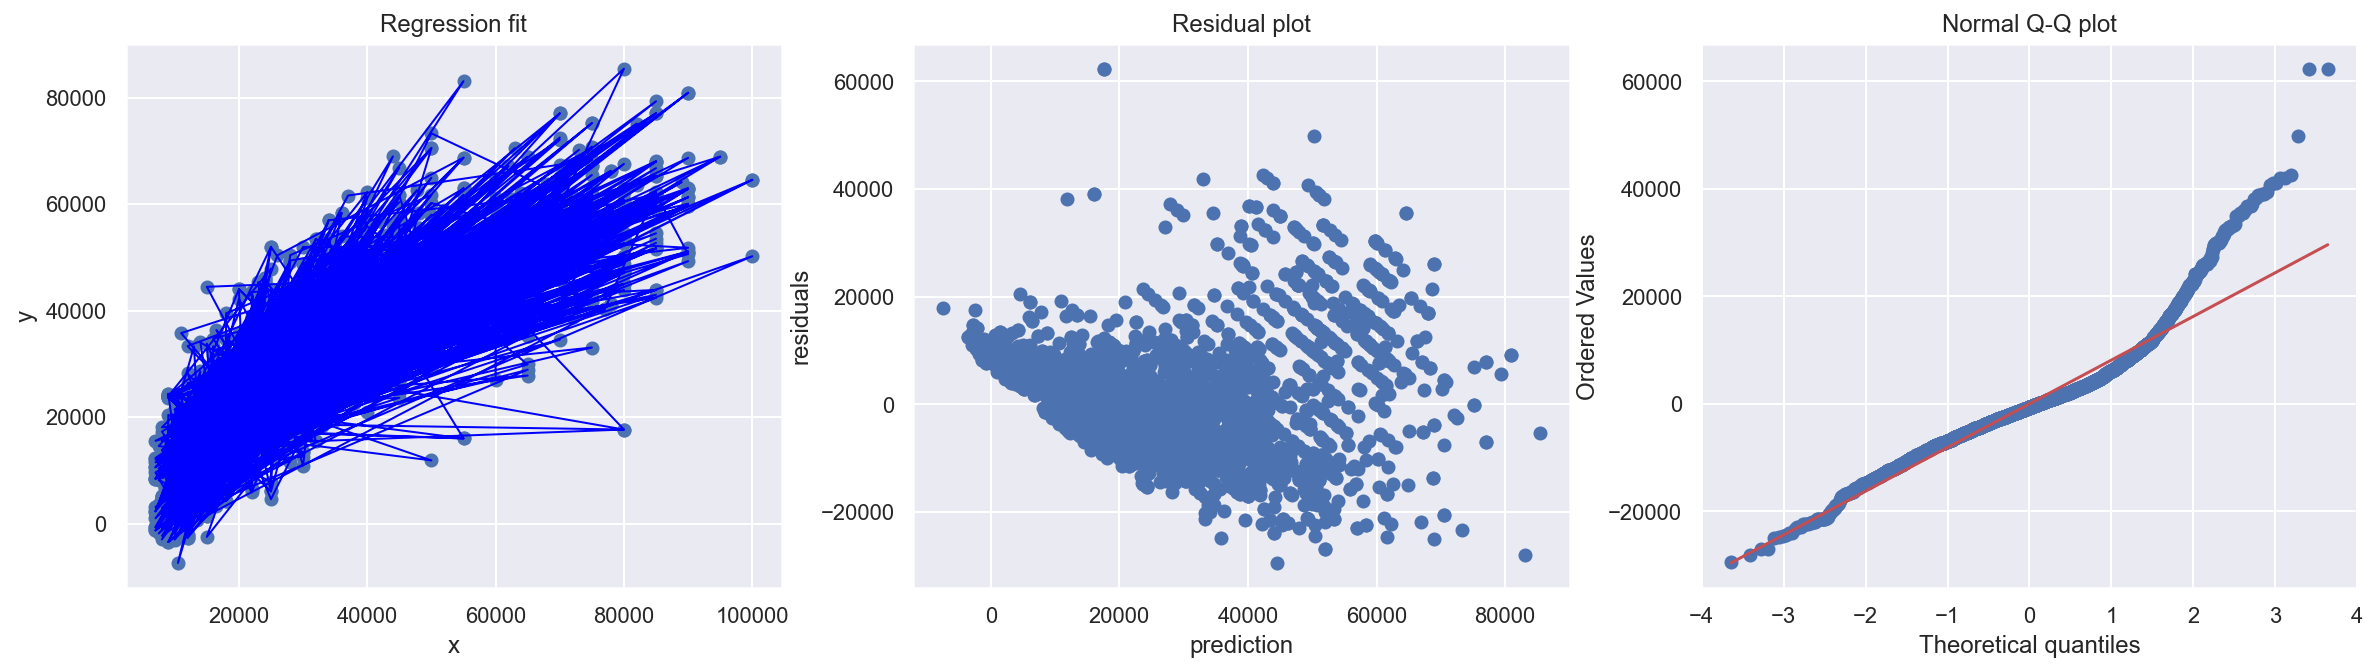

In [57]:
X33 = dataset.loc[:, [
    'BED', 'BATH', 'LIVING', 'AGE', 'IMAGES', 'FLOOR', 'TARGET', 'FURNISHED', 'KITCHEN',
    'ANNEXE', 'PARKING', 'ELEVATOR', 'AC', 'Amanat'
]]
y = (dataset['PRICE'])

diagnostic_plot(pd.get_dummies(X33, drop_first=True), y)   

## Linear Regression and Log10

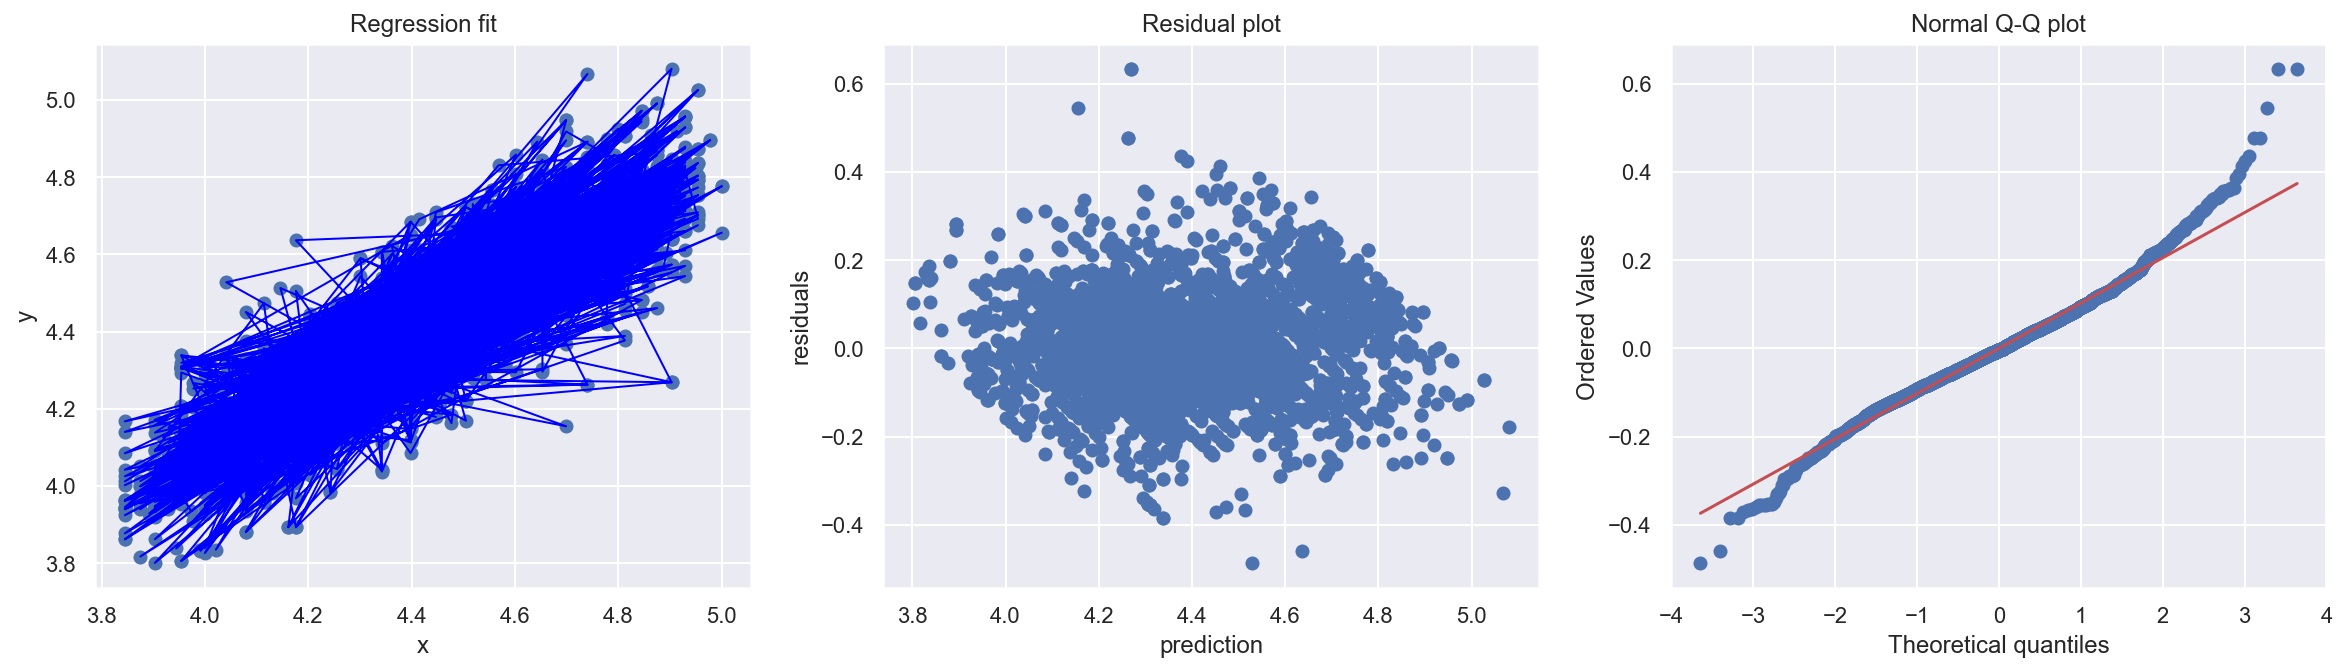

In [58]:
X33 = dataset.loc[:, [
    'BED', 'BATH', 'LIVING', 'AGE', 'IMAGES', 'FLOOR', 'TARGET', 'FURNISHED', 'KITCHEN',
    'ANNEXE', 'PARKING', 'ELEVATOR', 'AC', 'Amanat'
]]
y = np.log10(dataset['PRICE'])

diagnostic_plot(pd.get_dummies(X33, drop_first=True), y)